In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df["Glucose"].unique()

array([148,  85, 183, 150, 100, 118, 107, 103, 115, 126,  99, 196, 119,
       143, 125, 147,  97, 145, 117, 109, 158,  88,  92, 122, 138, 102,
        90, 111, 180, 133, 106, 171, 159, 146,  71, 105, 101, 176,  73,
       187,  84,  44, 141, 114,  95, 139, 129,  79,   0,  62, 131, 112,
       113,  74,  83, 137, 110, 136,  80, 123,  81, 134, 142, 144,  93,
       163, 151,  96, 155,  89,  76, 160, 124,  78, 162, 132, 120, 173,
       170, 128, 108, 154,  57, 156, 153, 188, 152, 104,  87,  75, 179,
       130, 194, 181, 135, 184, 140, 177, 197, 164,  91, 165,  86, 193,
       191, 161, 167,  77, 182, 157, 178, 116,  61, 189,  98, 166, 127,
        82,  72, 168, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [7]:
df["BMI"].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [8]:
df["BloodPressure"].unique()

array([ 50,  66,  64,  40,  74,   0,  70,  96,  92,  80,  60,  72,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [9]:
df["SkinThickness"].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [10]:
df["Insulin"].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [11]:
df["Age"].unique()

array([50, 31, 52, 21, 33, 30, 26, 29, 35, 54, 34, 57, 59, 51, 32, 27, 41,
       43, 22, 38, 60, 28, 45, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 66, 49, 63, 67, 72, 81, 64, 53, 70,
       68], dtype=int64)

In [12]:
df["DiabetesPedigreeFunction"].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [13]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isna().sum() # No null values detected

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Train Test Split

In [15]:
x=df.drop("Outcome",axis=1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [16]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=9, stratify=y)

## Model Training

In [18]:
# Creating Instance 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

In [19]:
# Predicting Outcome
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [20]:
# Predicting Probabilities

y_pred_prob = model.predict_proba(x_test)
y_pred_prob

array([[0.9035439 , 0.0964561 ],
       [0.50963146, 0.49036854],
       [0.20363693, 0.79636307],
       [0.71872018, 0.28127982],
       [0.35052302, 0.64947698],
       [0.53641844, 0.46358156],
       [0.30224449, 0.69775551],
       [0.68130977, 0.31869023],
       [0.51758088, 0.48241912],
       [0.76988794, 0.23011206],
       [0.39045203, 0.60954797],
       [0.54898103, 0.45101897],
       [0.26701562, 0.73298438],
       [0.14834037, 0.85165963],
       [0.41175267, 0.58824733],
       [0.82994267, 0.17005733],
       [0.21594063, 0.78405937],
       [0.20352804, 0.79647196],
       [0.35256723, 0.64743277],
       [0.46052032, 0.53947968],
       [0.45038545, 0.54961455],
       [0.82423749, 0.17576251],
       [0.70964236, 0.29035764],
       [0.62018243, 0.37981757],
       [0.22484744, 0.77515256],
       [0.69390192, 0.30609808],
       [0.19881006, 0.80118994],
       [0.43361077, 0.56638923],
       [0.86803135, 0.13196865],
       [0.96462839, 0.03537161],
       [0.

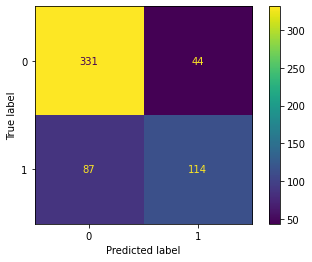

In [21]:
# Plotting Confusion Matrix for training data
plot_confusion_matrix(model,x_train,y_train)

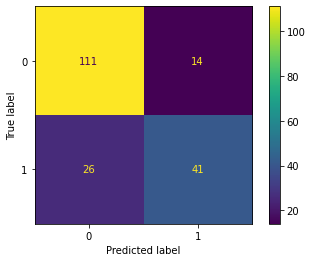

In [22]:
# Plotting Confusion Matrix for testing data
plot_confusion_matrix(model,x_test,y_test)

## Model Evaluation

In [23]:
# Training data

# prediction
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[331  44]
 [ 87 114]]
*********************************************
Accuracy Score: 0.7725694444444444
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       375
           1       0.72      0.57      0.64       201

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



In [24]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[111  14]
 [ 26  41]]
*********************************************
Accuracy Score: 0.7916666666666666
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       125
           1       0.75      0.61      0.67        67

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



In [25]:
# prediction probability
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting class 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([1.99227094, 0.99227094, 0.96480094, 0.90173176, 0.89260885,
       0.83333236, 0.8287302 , 0.82730919, 0.8247692 , 0.80405295,
       0.7915697 , 0.78278015, 0.77902398, 0.77346775, 0.7731269 ,
       0.76954641, 0.75824768, 0.74611341, 0.74455669, 0.74255487,
       0.73858875, 0.72974781, 0.7061753 , 0.68731262, 0.68205752,
       0.6767143 , 0.67410755, 0.66311651, 0.65374244, 0.64679203,
       0.64577303, 0.6413723 , 0.64008581, 0.6316252 , 0.62567272,
       0.62150671, 0.61913383, 0.61274888, 0.6064462 , 0.60498775,
       0.60062347, 0.59969289, 0.59903754, 0.59152406, 0.59047144,
       0.55236697, 0.55108489, 0.54846497, 0.54363883, 0.54232875,
       0.53891943, 0.53777606, 0.52768584, 0.51725583, 0.51263844,
       0.48012906, 0.4767639 , 0.47647867, 0.47646353, 0.47315808,
       0.46005038, 0.45817343, 0.4553642 , 0.45335322, 0.45043102,
       0.44810693, 0.441155  , 0.44084585, 0.43003181, 0.42719035,
       0.41954601, 0.41789407, 0.41673335, 0.41621797, 0.41150

Text(0.5, 1.0, 'Reciever Operating Characteristics')

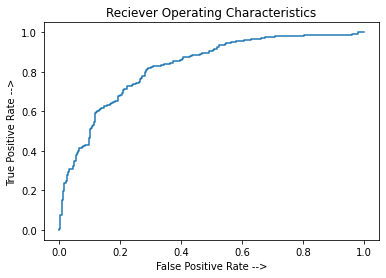

In [26]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

In [27]:
import pickle

with open("diabetes.pkl","wb") as f:
    pickle.dump(model,f)

In [28]:
json_dict = {"columns":list(x.columns)}

In [29]:
import json

with open("json_data.json","w") as f:
    json.dump(json_dict,f)
    